<a href="https://colab.research.google.com/github/comojin1994/Deep_Learning_Study/blob/master/3step_lecture/Shallow_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

In [6]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
%cd ./gdrive/My\ Drive/Deep_learning/Study/3Step
!ls

/content/gdrive/My Drive/Deep_learning/Study/3Step
Basic_setting_Expert.ipynb  ch2_parameters.npz
ch2_dataset.npz		    Shallow_neural_network.ipynb


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


### Sigmoid ftn

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

### Softmax ftn

In [0]:
def softmax(x):
  e_x = np.exp(x)
  return e_x / np.sum(e_x)

### Define network

In [0]:
class ShallowNN:
  def __init__(self, num_input, num_hidden, num_output):
    self.W_h = np.zeros((num_hidden, num_input), dtype = np.float32)
    self.b_h = np.zeros((num_hidden), dtype = np.float32)
    self.W_o = np.zeros((num_output, num_hidden), dtype = np.float32)
    self.b_o = np.zeros((num_output), dtype = np.float32)
    
  def __call__(self, x):
    h = sigmoid(np.matmul(self.W_h, x) + self.b_h)
    return softmax(np.matmul(self.W_o, h) + self.b_o)

### Load Data

In [0]:
dataset = np.load('ch2_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

### Create Model

In [0]:
model = ShallowNN(2, 128, 10)

### Load Parameter

In [0]:
weights = np.load('ch2_parameters.npz')
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

### Run model

In [17]:
outputs = list()
for pt, label in zip(inputs, labels):
  output = model(pt)
  outputs.append(np.argmax(output))
  print(np.argmax(output), label)
outputs = np.stack(outputs, axis=0)

0 0
0 0
2 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
2 0
3 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
6 0
0 0
0 0
0 0
0 0
0 0
6 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
6 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
9 0
0 0
2 0
6 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
9 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
5 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
0 2
0 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
3 2
2 2
2 2
2 2
2 2
3 2
2 2
2 2
2 2
2 2
0 2
1 2
0 2
0 2
2 2
2 2
0 2
2 2
2 2
0 2
0 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 2
2 2
2 2


### Visualization

In [0]:
%matplotlib inline

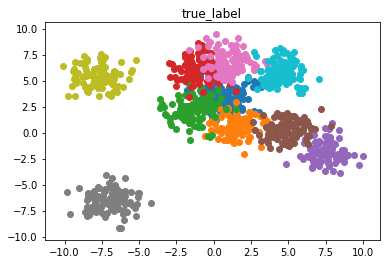

In [22]:
plt.figure()
for idx in range(10):
  mask = labels == idx
  plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('true_label')
plt.show()

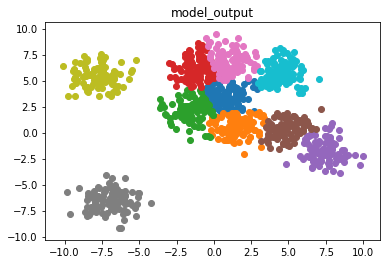

In [24]:
plt.figure()
for idx in range(10):
  mask = outputs == idx
  plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('model_output')
plt.show()